# The Spark Foundation Network

# Author:  Muhammad Hassan

## Task#6 Decsion Tree Classifier on Iris Dataset

## Data Science and Business Analytics 

## Language : Python
## IDE : Jupyternotebok



## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_iris = pd.read_csv('C:/Users/user/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df_iris.shape

(150, 6)

In [5]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


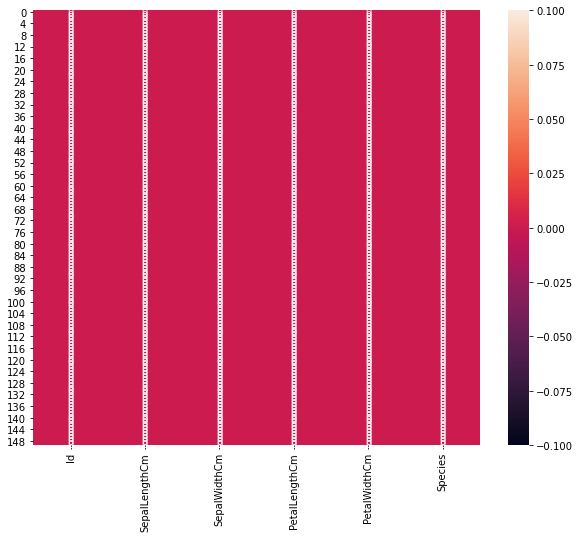

In [6]:
#let make it easy to show with heatmap if there is any null values or not
plt.figure(figsize=(10,8))
sns.heatmap(df_iris.isnull(), annot=True);

## Visualization the Data

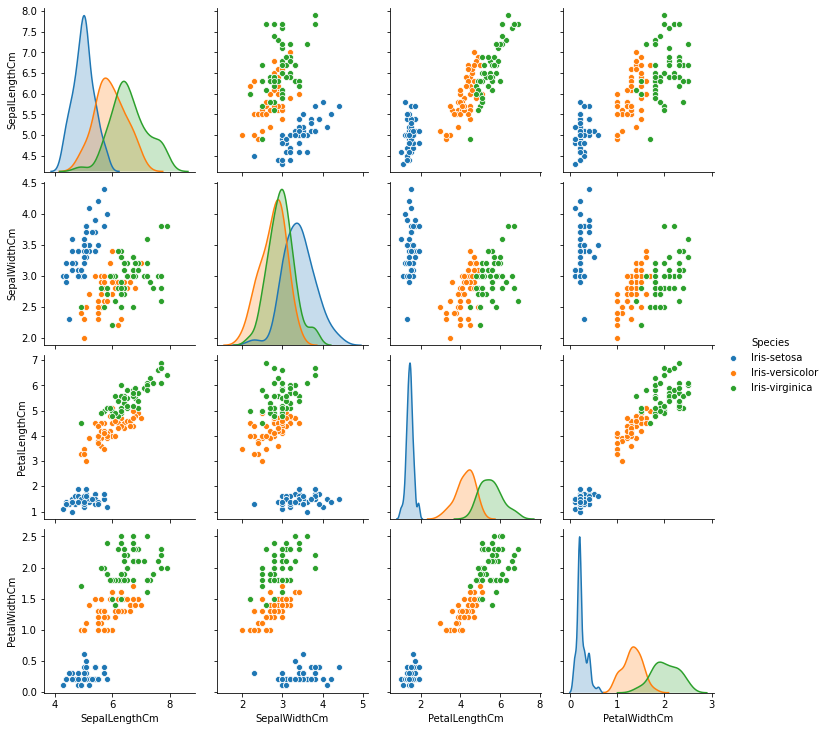

In [7]:
features = df_iris.drop('Id', axis=1)
sns.pairplot(features, hue='Species');

## Correlation between numerical columns

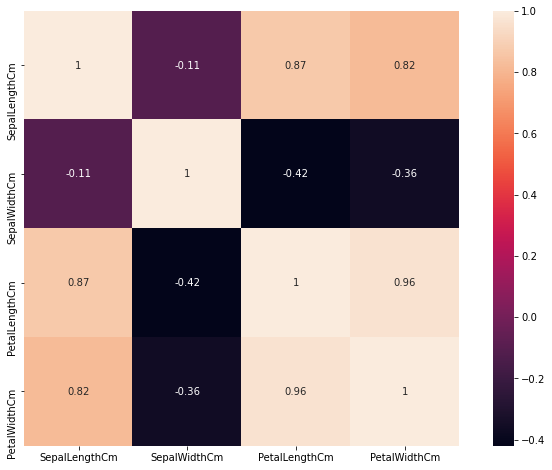

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(features.corr(), annot = True, square = True);

## Target value has three class

In [8]:
df_iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

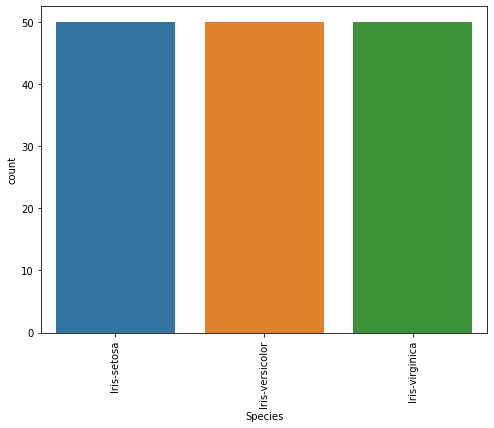

In [9]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(x='Species', data=df_iris);

In [10]:
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## BoxPlot to represent the values with target

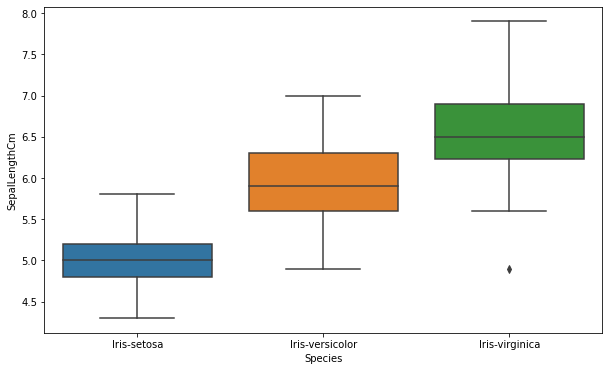

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Species', y ='SepalLengthCm', data=df_iris);

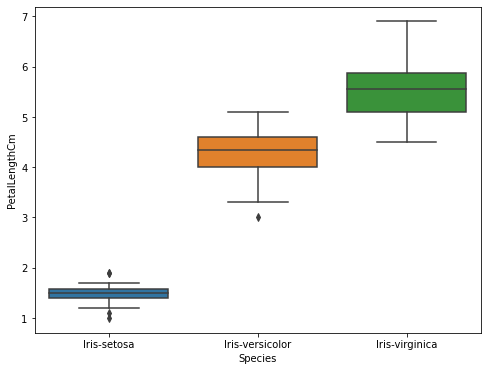

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Species', y ='PetalLengthCm', data=df_iris);

## Convert all Categorical values into numberical

In [13]:
df_iris['Species'] = df_iris['Species'].replace({0:"Iris-versicolor", 1:"Iris-setosa",2:"Iris-virginica"})

In [14]:
X = df_iris.drop(["Id","Species"], axis=1)
y = df_iris['Species']

In [15]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Divide the data into train and test

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [19]:
print(y_test.shape)

(30,)


## Decision Tree Classifier 

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [38]:
from sklearn import metrics
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.967


In [45]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.05115983, 0.94884017])

In [47]:
print(metrics.classification_report(prediction,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.97        30
      macro avg       0.94      0.98      0.96        30
   weighted avg       0.97      0.97      0.97        30

